In [1]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created Jun 7, 2023 for TRIPs-Py library
"""
__authors__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"

In [3]:
from select import select
from trips.decompositions import generalized_golub_kahan, arnoldi
import numpy as np
from scipy import linalg as la
from trips.parameter_selection.gcv import *
from trips.parameter_selection.discrepancy_principle import *

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [3]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created December 10, 2022 for TRIPs-Py library
"""
__author__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"
import os,sys
sys.path.insert(0,'/Users/mirjetapasha/Documents/Research_Projects/TRIPSpy/TRIPSpy')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from trips.operators import *
##Specify the font
##Latex needs to be installed! If not installed, please comment the following 5 lines
# parameters = {'xtick.labelsize': 12, 'ytick.labelsize': 12,
#           'axes.titlesize': 18, 'axes.labelsize': 18, 'figure.titlesize': 14, 'legend.fontsize': 13}
# plt.rcParams.update(parameters)
import time
import numpy as np
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astra
# import phantoms as phantom
from venv import create
import pylops
from scipy.ndimage import convolve
from scipy import sparse
from scipy.ndimage import convolve
import scipy.special as spe
from trips.testProblems import *
from trips.operators import *
from trips.solvers.gks import *
from trips.solvers.Tikhonov import *
from trips.solvers.tSVD import *

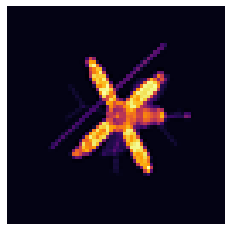

<Figure size 432x288 with 0 Axes>

In [4]:
# Deblurring example test problem
Deblur = Deblurring()
# In the class Deblurring we have can define the type of problem to be used.
generate_matrix = True #Defines a blurring operator where the forward operator matrix is formed explicitly
imagesize_x = 64 # Define the first dimension of the image
imagesize_y = 64 # Defines the second dimension of the image
spread = 1.5 # The PSF parameter
choose_image = 'satellite64' #The choice of the image
if generate_matrix == True:
        # spread = [2,2]
        size = imagesize_x
        shape = (size, size)
        spreadnew = (spread, spread)
        A = Deblur.forward_Op_matrix(spreadnew, shape, imagesize_x, imagesize_y)
x_true = Deblur.generate_true(choose_image)
b_true = Deblur.generate_data(x_true, generate_matrix)
(b, delta) = Deblur.add_noise(b_true, 'Gaussian', noise_level = 0.01)
Deblur.plot_rec(x_true.reshape((shape), order = 'F'), save_imgs = True, save_path='./saveImagesDeblurring'+'rec'+choose_image)

In [8]:
xx = Arnoldi_Tikhonov(A, b, L = 'Identity', projection_dim=3, iter= 4, dp_stop = 0, param_choice = 'manual', automatic_param = 'gcv', reg_param = 1, delta = 0)

[[ 0.00184384]
 [ 0.0003347 ]
 [-0.00017804]
 ...
 [ 0.00211723]
 [-0.0004735 ]
 [ 0.00337647]]


TypeError: only integer scalar arrays can be converted to a scalar index

In [6]:
def Arnoldi_Tikhonov(A, b, L = 'Identity', projection_dim=3, iter=50, dp_stop = 0, param_choice = 'manual', automatic_param = 'gcv', reg_param = 1, delta = 0, **kwargs):
    if A.shape[0] == A.shape[1]:
        b_vec = b.reshape((-1,1))
        (V,H) = arnoldi(A, b_vec, projection_dim, dp_stop, **kwargs)
        UU = V[:, 0:-1]
        HH = H[0:-1, :]
        bhat = UU.T.dot(b_vec)
        if param_choice == 'manual':
            y = np.linalg.solve(HH.T*HH + reg_param*L, bhat)
            x_AT = UU.dot(y)
        else:
            if automatic_param == 'gcv':
                L = np.identity(HH.shape[1], dtype='float32')
                reg_param = generalized_crossvalidation(HH, bhat, L, **kwargs)['x'] # find ideal lambda by crossvalidation
            else:
                reg_param = discrepancy_principle(HH, bhat, L, eta = 1.01, noise_norm = delta, **kwargs)['x'][0] # find ideal lambdas by crossvalidation
                L = np.identity(HH.shape[1], dtype='float32')
            y = np.linalg.solve(HH.T*HH + reg_param[0]*L, bhat)
            x_AT = UU.dot(y)
    else:
        raise Warning("The matrix is not square. Arnoldi can not be applied")
    return (x_AT)